In [52]:
# Expand output to show more rows, columns, and width.
import pandas as pd
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 50000)

[*********************100%***********************]  1 of 1 completed


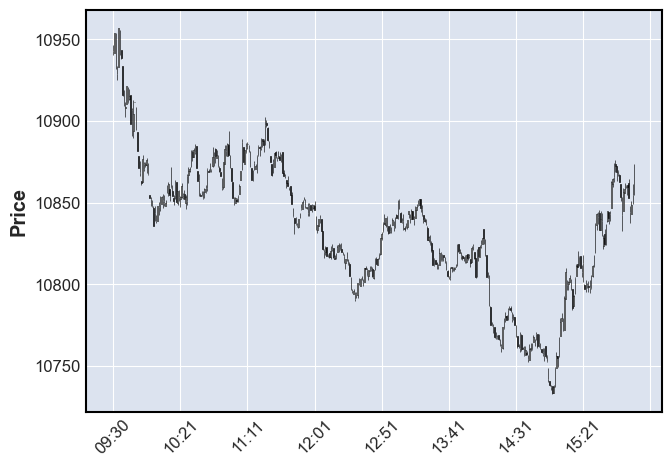

In [53]:
# !pip install yfinance --user
# !pip install mplfinance --user
import yfinance as yf
import mplfinance as mpf
from datetime import datetime
import matplotlib.pyplot as plt
sd = datetime(2022, 9, 23)
ed = datetime(2022, 9, 26)
df = yf.download(tickers='^IXIC', start=sd, end=ed, interval="1m")
mpf.plot(df,type='candle',volume=False)

In [54]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-09-23 09:30:00-04:00,10946.780273,10946.780273,10940.367188,10943.125000,10943.125000,0
2022-09-23 09:31:00-04:00,10941.550781,10954.095703,10941.550781,10954.095703,10954.095703,19542340
2022-09-23 09:32:00-04:00,10953.967773,10953.967773,10932.098633,10932.098633,10932.098633,18468831
2022-09-23 09:33:00-04:00,10928.850586,10933.740234,10924.948242,10933.740234,10933.740234,20122904
2022-09-23 09:34:00-04:00,10933.010742,10956.976562,10933.010742,10956.976562,10956.976562,20268888


In [57]:
#df[['Close', 'ema-short', 'ema-mid', 'ema-long']].plot()
df1 = df.copy()
trend_lag  = 10

df1['ema-short'] = df1['Close'].shift(1).ewm(alpha=(2/(9+1))).mean()
df1['ema-short-trend'] = df1['ema-short'] - df1['ema-short'].shift(trend_lag)

df1['ema-mid'] = df1['Close'].shift(1).ewm(alpha=(2/(50+1))).mean()
df1['ema-mid-trend'] = df1['ema-mid'] - df1['ema-mid'].shift(trend_lag)
df1['lower_threshold'] = df1['ema-mid'] * 0.99995
df1['higher_threshold'] = df1['ema-mid'] * 1.00015

df1['ema-long'] = df1['Close'].shift(1).ewm(alpha=(2/(100+1))).mean()

df1['ema-long-trend'] = df1['ema-long'] - df1['ema-long'].shift(trend_lag)



display(df1.shape)

apdict = mpf.make_addplot(df1[650:700][['ema-short', 'ema-mid', 'ema-long', 'lower_threshold', 'higher_threshold']])
#mpf.plot(df1[650:700],type='candle',volume=False, figsize=(20,10), addplot=apdict)
display(df1.shape)


df1.dropna(inplace=True)
df1.reset_index(inplace=True)
display(df1.head())

(389, 14)

(389, 14)

,Datetime,Open,High,Low,Close,Adj Close,Volume,ema-short,ema-short-trend,ema-mid,ema-mid-trend,lower_threshold,higher_threshold,ema-long,ema-long-trend
0,2022-09-23 09:41:00-04:00,10920.958008,10920.958008,10911.068359,10911.765625,10911.765625,17116725,10924.289923,-18.835077,10930.722726,-12.402274,10930.176190,10932.362335,10931.479892,-11.645108
1,2022-09-23 09:42:00-04:00,10913.204102,10919.288086,10912.706055,10915.093750,10915.093750,14787897,10921.600229,-27.619606,10928.772815,-19.947244,10928.226376,10930.412131,10929.650365,-19.014840
2,2022-09-23 09:43:00-04:00,10915.812500,10915.812500,10898.039062,10898.039062,10898.039062,14884624,10920.223232,-21.979717,10927.449988,-15.506529,10926.903615,10929.089105,10928.391386,-14.640820
3,2022-09-23 09:44:00-04:00,10890.998047,10908.003906,10890.998047,10906.581055,10906.581055,19630191,10915.582287,-23.753888,10924.760437,-15.751959,10924.214199,10926.399151,10925.930375,-14.708688
4,2022-09-23 09:45:00-04:00,10893.534180,10912.861328,10889.591797,10904.065430,10904.065430,20961960,10913.716390,-30.867402,10923.180504,-20.893312,10922.634345,10924.818981,10924.452093,-19.586464


### enter rules
- All exponential moving average in same trend and space between them 
- candle breaking the 20-ema with an opposite trend
- next candle breaking the 20-ema favor to trend
- enter posision with stop-loss as the min of the previous candle if bullish, or max is the previous candle if bearish
- take profit as 1:1 in favor of the trend



In [58]:
display(df1.head(), df1.shape)

,Datetime,Open,High,Low,Close,Adj Close,Volume,ema-short,ema-short-trend,ema-mid,ema-mid-trend,lower_threshold,higher_threshold,ema-long,ema-long-trend
0,2022-09-23 09:41:00-04:00,10920.958008,10920.958008,10911.068359,10911.765625,10911.765625,17116725,10924.289923,-18.835077,10930.722726,-12.402274,10930.176190,10932.362335,10931.479892,-11.645108
1,2022-09-23 09:42:00-04:00,10913.204102,10919.288086,10912.706055,10915.093750,10915.093750,14787897,10921.600229,-27.619606,10928.772815,-19.947244,10928.226376,10930.412131,10929.650365,-19.014840
2,2022-09-23 09:43:00-04:00,10915.812500,10915.812500,10898.039062,10898.039062,10898.039062,14884624,10920.223232,-21.979717,10927.449988,-15.506529,10926.903615,10929.089105,10928.391386,-14.640820
3,2022-09-23 09:44:00-04:00,10890.998047,10908.003906,10890.998047,10906.581055,10906.581055,19630191,10915.582287,-23.753888,10924.760437,-15.751959,10924.214199,10926.399151,10925.930375,-14.708688
4,2022-09-23 09:45:00-04:00,10893.534180,10912.861328,10889.591797,10904.065430,10904.065430,20961960,10913.716390,-30.867402,10923.180504,-20.893312,10922.634345,10924.818981,10924.452093,-19.586464


(378, 15)

In [59]:
state = []
hist = []
stop_loss = []
take_profit = []
for i in df1.index:
    if len(hist) < 1:
        hist.append(0)
    
    elif len(state) < 1:
        print(i)
        
    
        #################### Entry rules #############
        
        
        # Bullish rules
        if (df1['ema-short-trend'][i] > 0) and (df1['ema-mid-trend'][i] > 0) and (df1['ema-long-trend'][i] > 0):
            print('what')

            if (df1['ema-short'][i] > df1['higher_threshold'][i]) and (df1['ema-long'][i] < df1['lower_threshold'][i]):
                print(df1['Datetime'][i])
                print(df1['Close'][i-1])
                print(df1['ema-short'][i-1])
                
                print(df1['Close'][i])
                print(df1['ema-short'][i])
                print(' ')
                print(' ')

                if (df1['Close'][i-1] < df1['ema-short'][i-1]) and (df1['Close'][i] > df1['ema-short'][i]):
                    print('hello')
                    hist.append(1)
                    state.append(1)
                    stop_loss.append(df1['Open'][i])
                    take_p = df1['Close'][i] - df1['Open'][i]
                    take_profit.append(df1['Close'][i] + take_p)
                    
                else:
                    hist.append(0)
                    
            else:
                hist.append(0)
                    
        # Bearish rules
        elif (df1['ema-short-trend'][i] < 0) and (df1['ema-mid-trend'][i] < 0) and (df1['ema-long-trend'][i] < 0):

            if (df1['ema-short'][i] < df1['lower_threshold'][i]) and (df1['ema-long'][i] > df1['higher_threshold'][i]):
                
                print('now')

                if (df1['Close'][i-1] > df1['ema-short'][i-1]) and (df1['Close'][i] < df1['ema-short'][i]):
                    print(df1['Datetime'][i])
                    print(df1['Close'][i-1])
                    print(df1['ema-short'][i-1])

                    print(df1['Close'][i])
                    print(df1['ema-short'][i])
                    print(' ')
                    print(' ')
                    hist.append(-1)
                    state.append(-1)
                    stop_loss.append(df1['Open'][i])
                    take_p = df1['Open'][i] - df1['Close'][i]
                    take_profit.append(df1['Close'][i] - take_p)
                    
                else:
                    hist.append(0)
                
            else:
                hist.append(0)
                    
                    
        else:
            print('wtf')
            hist.append(0)
            
    elif state[-1] == 1:
        print('bullish')
        if (df1['Open'][i] <= stop_loss[-1]) or (df1['Open'][i] >= take_profit[-1]):
            hist[-1] = 0
            hist.append(0)
            state.clear()
            stop_loss.clear()
            take_profit.clear()
        elif (df1['Close'][i] <= stop_loss[-1]) or (df1['Close'][i] >= take_profit[-1]):
            hist.append(0)
            state.clear()
            stop_loss.clear()
            take_profit.clear()
            
        else:
            hist.append(1)
            state.append(1)
            
    elif state[-1] == -1:
        print(df1['Datetime'][i])
        print('stop_loss')
        print(stop_loss[-1])
        print(df1['Open'][i])
        
        if (df1['Open'][i] >= stop_loss[-1]) or (df1['Open'][i] <= take_profit[-1]):
            hist[-1] = 0
            hist.append(0)
            state.clear()
            stop_loss.clear()
            take_profit.clear()
            
        elif (df1['Close'][i] >= stop_loss[-1]) or (df1['Close'][i] <= take_profit[-1]):
            hist.append(0)
            state.clear()
            stop_loss.clear()
            take_profit.clear()
            
        else:
            hist.append(-1)
            state.append(-1)
        
        
            
            
    

1
2
3
4
5
6
7
8
now
9
now
10
now
11
now
12
now
13
now
14
now
15
now
16
now
17
now
18
now
19
now
20
now
21
now
22
now
23
now
24
now
25
now
26
now
27
now
2022-09-23 10:09:00-04:00
10851.8330078125
10850.318499491816
10849.9931640625
10850.621464079237
 
 
2022-09-23 10:10:00-04:00
stop_loss
10851.248046875
10847.9404296875
29
now
30
now
31
now
32
wtf
33
wtf
34
wtf
35
wtf
36
wtf
37
wtf
38
wtf
39
wtf
40
wtf
41
wtf
42
wtf
43
now
44
now
45
wtf
46
wtf
47
wtf
48
wtf
49
wtf
50
wtf
51
wtf
52
what
53
what
54
what
55
what
56
wtf
57
wtf
58
wtf
59
now
60
now
61
now
62
63
64
wtf
65
wtf
66
what
67
what
68
what
69
what
70
what
71
what
72
what
73
what
74
what
75
what
76
what
77
what
78
wtf
79
wtf
80
wtf
81
wtf
82
now
83
now
84
now
85
now
86
now
87
88
89
wtf
90
what
91
what
92
what
93
what
94
what
95
what
96
what
97
what
98
what
99
what
100
what
2022-09-23 11:22:00-04:00
10889.2998046875
10877.570502483884
10887.8994140625
10879.916362924647
 
 
101
what
2022-09-23 11:23:00-04:00
10887.8994140625
10879.9

In [60]:
df1.shape

(378, 15)

IndexError: index -1 is out of bounds for axis 0 with size 0

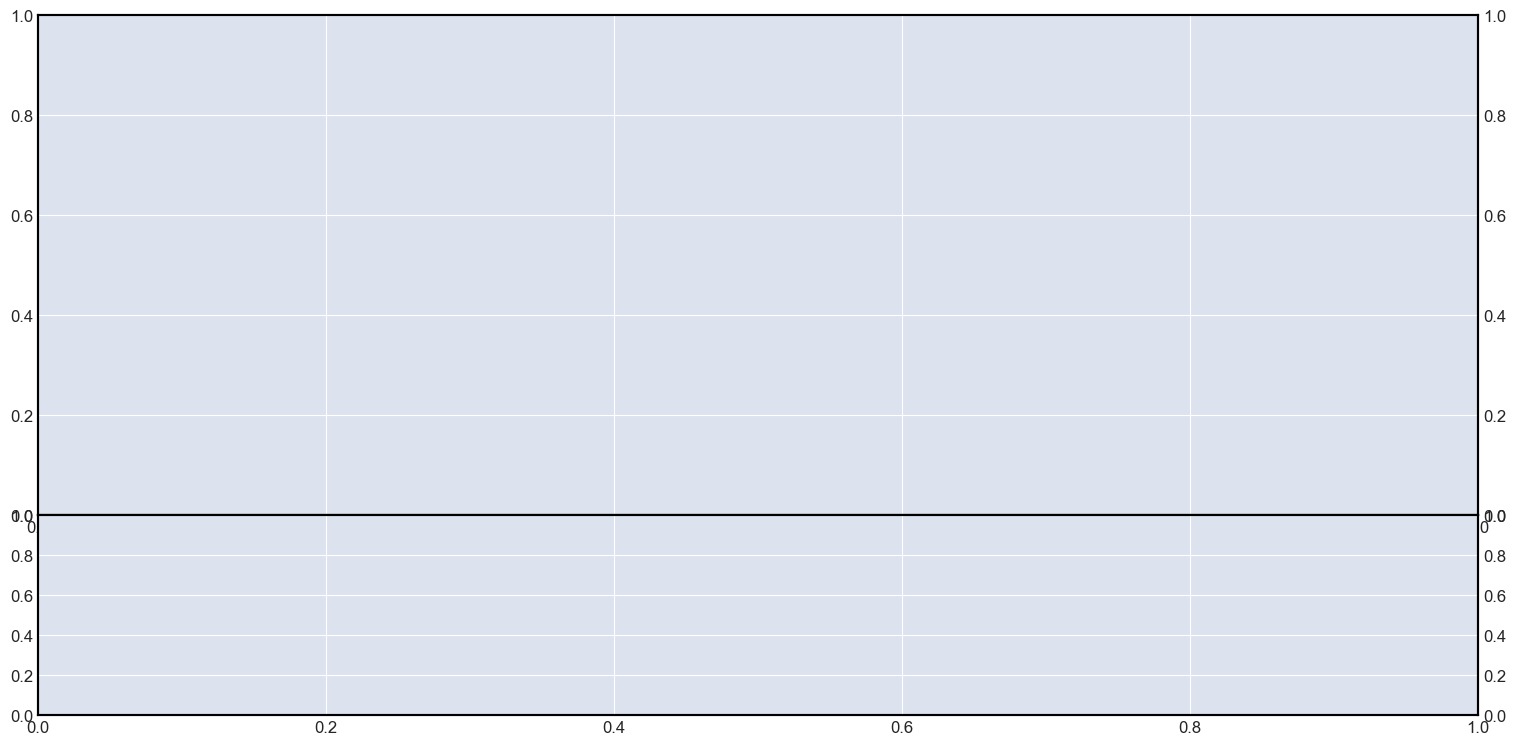

In [61]:
df_plot = df1.copy()
df_plot.set_index('Datetime', inplace=True)
df_plot = df_plot['2022-08-29 10:30':'2022-08-31 11:30']

apdict = mpf.make_addplot(df_plot[['ema-short', 'ema-mid', 'ema-long', 'lower_threshold', 'higher_threshold']])
mpf.plot(df_plot,type='candle',volume=True, figsize=(20,10), addplot=apdict)
display(df_plot.shape)



<AxesSubplot:xlabel='Datetime'>

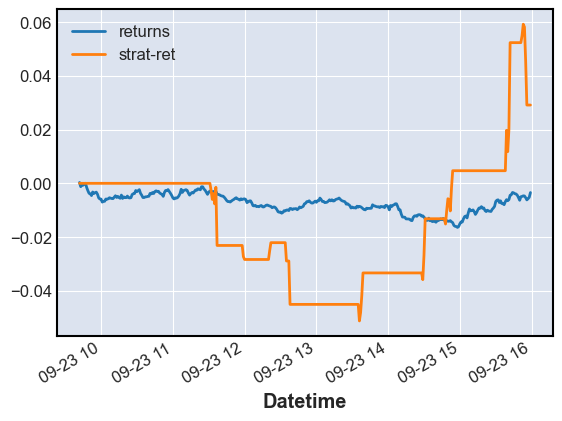

In [62]:
df2 = df1.copy()
df2['hist'] = hist
df2.set_index('Datetime', inplace=True)

#df2 = df2[['Open', 'High', 'Low', 'Close', 'hist']]
df2['returns'] = (df2['Close'] - df2['Close'].shift())/ df['Close'].shift()
df2['hist'] = df2['hist'].shift(1)
df2['strat-ret'] = df2['returns'] * df2['hist'] * 20
df2[['returns', 'strat-ret']].cumsum().plot()


